In [1]:

%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib
from matplotlib import cm
import scipy.cluster.hierarchy as sch

In [104]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
#
#------------------------------
# Name:     
# Purpose:  
# 
# @uthor:   acph - dragopoot@gmail.com
#
# Created:     
# Copyright:   (c) acph 2015
# Licence:     GNU GENERAL PUBLIC LICENSE, Version 3, 29 June 2007
#------------------------------
""" """


' '

# Example with iris data

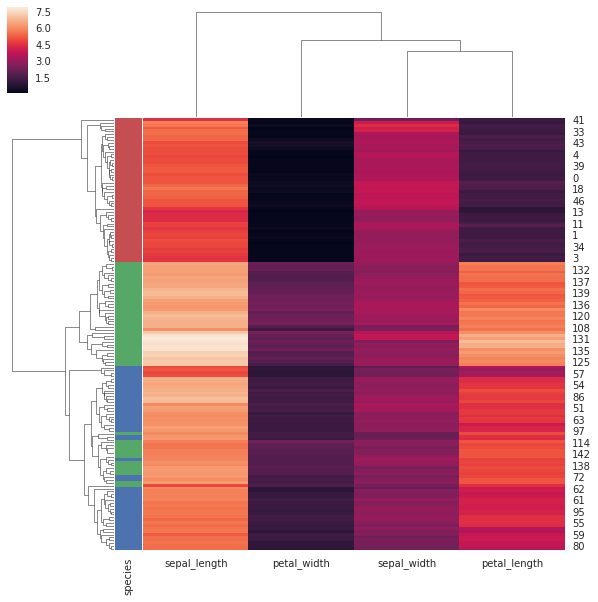

In [3]:
import seaborn as sns
sns.set(color_codes=True)
iris = sns.load_dataset("iris")
species = iris.pop("species")
lut = dict(zip(species.unique(), "rbg"))
row_colors = species.map(lut)
g = sns.clustermap(iris, row_colors=row_colors)

In [5]:
species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
10        setosa
11        setosa
12        setosa
13        setosa
14        setosa
15        setosa
16        setosa
17        setosa
18        setosa
19        setosa
20        setosa
21        setosa
22        setosa
23        setosa
24        setosa
25        setosa
26        setosa
27        setosa
28        setosa
29        setosa
         ...    
120    virginica
121    virginica
122    virginica
123    virginica
124    virginica
125    virginica
126    virginica
127    virginica
128    virginica
129    virginica
130    virginica
131    virginica
132    virginica
133    virginica
134    virginica
135    virginica
136    virginica
137    virginica
138    virginica
139    virginica
140    virginica
141    virginica
142    virginica
143    virginica
144    virginica
145    virginica
146    virginica
147    virgini

In [342]:
iris.max()

sepal_length    7.9
sepal_width     4.4
petal_length    6.9
petal_width     2.5
dtype: float64

In [2]:
data2=pd.read_table("../data/genus.taxonomy.tab", index_col=0)
data2=data2.drop('Nonspecific/Host')
data2.head()

,Roll Up Level,Rank,Tax ID,Type,Phylum,Class,Order,Family,Genus,Species,...,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12
Sample Name,,,,,,,,,,,,,,,,,,,,,
Bacteria unclassified,genus,superkingdom,2,Bacteria,NaN,NaN,NaN,NaN,NaN,NaN,...,1550,1925,1651,1652,1938,2156,2058,2401,2537,2551
Desulfatitalea,genus,genus,1303912,Bacteria,Proteobacteria,Deltaproteobacteria,Desulfobacterales,Desulfobacteraceae,Desulfatitalea,NaN,...,4791,59,3120,372,966,5216,267,499,2709,532
Proteobacteria unclassified,genus,phylum,1224,Bacteria,Proteobacteria,NaN,NaN,NaN,NaN,NaN,...,1418,1661,1320,1276,1591,1547,1519,1471,1283,2289
Rhodobacteraceae unclassified,genus,family,31989,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,NaN,NaN,...,2648,2241,1537,600,1044,1033,998,782,417,808
Alphaproteobacteria unclassified,genus,class,28211,Bacteria,Proteobacteria,Alphaproteobacteria,NaN,NaN,NaN,NaN,...,1263,1479,919,737,1009,831,951,883,546,996


In [3]:
data2.columns



Index(['Roll Up Level', 'Rank', 'Tax ID', 'Type', 'Phylum', 'Class', 'Order',
       'Family', 'Genus', 'Species', 'All Samples', 'S1', 'S2', 'S3', 'S4',
       'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12'],
      dtype='object')

In [3]:
newdf=data2[['S1', 'S2', 'S3', 'S4','S5', 'S6',
       'S7', 'S8', 'S9', 'S10', 'S11', 'S12']]
newdf.columns = ['A_Autumn_12', 'B_Autumn_12','C_Autumn_12',
                 'A_Spring 13', 'B_Spring 13', 'B_Spring 13', 
                 'A_Autumn 13', 'B_Autumn 13', 'B_Autumn 13',
                 'A_Spring 14', 'C_Spring 14', 'C_Spring 14',]

## **help** aqui no se si estoy haciendo  el drop de los menos abundantes

In [4]:
newdf=newdf/newdf.sum()
newdf = newdf[(newdf.T != 0).any()]
newdf.head()

,A_Autumn_12,B_Autumn_12,C_Autumn_12,A_Spring 13,B_Spring 13,B_Spring 13,A_Autumn 13,B_Autumn 13,B_Autumn 13,A_Spring 14,C_Spring 14,C_Spring 14
Sample Name,,,,,,,,,,,,
Bacteria unclassified,0.059515,0.034961,0.035846,0.047151,0.047101,0.079576,0.055871,0.056328,0.069912,0.089966,0.107092,0.078015
Desulfatitalea,0.007739,0.018758,0.110800,0.001445,0.089011,0.017919,0.027849,0.136273,0.009070,0.018698,0.114352,0.016270
Proteobacteria unclassified,0.045071,0.025035,0.032794,0.040685,0.037658,0.061464,0.045867,0.040417,0.051602,0.055118,0.054158,0.070002
Rhodobacteraceae unclassified,0.054424,0.052040,0.061240,0.054891,0.043849,0.028902,0.030098,0.026988,0.033903,0.029302,0.017602,0.024710
Alphaproteobacteria unclassified,0.038821,0.026275,0.029209,0.036227,0.026218,0.035501,0.029089,0.021711,0.032306,0.033086,0.023048,0.030460


In [5]:
newdf=newdf[~newdf[newdf<=0.001].any(axis=1)] #aqui supuestamente nos quedamos con aquellos con abundancia 
#mayor a este cut-off lo puse basandome en el heatmap , pero dependiendo de cut-off el heatmap sale diferente
#habria forma de dcirle que me de los mas abundantes? 
#agregar una bicha con el mismo valor para el analisis de bray curtis

newdf.loc[64] = 0.001
newdf.head()


,A_Autumn_12,B_Autumn_12,C_Autumn_12,A_Spring 13,B_Spring 13,B_Spring 13,A_Autumn 13,B_Autumn 13,B_Autumn 13,A_Spring 14,C_Spring 14,C_Spring 14
Sample Name,,,,,,,,,,,,
Bacteria unclassified,0.059515,0.034961,0.035846,0.047151,0.047101,0.079576,0.055871,0.056328,0.069912,0.089966,0.107092,0.078015
Desulfatitalea,0.007739,0.018758,0.110800,0.001445,0.089011,0.017919,0.027849,0.136273,0.009070,0.018698,0.114352,0.016270
Proteobacteria unclassified,0.045071,0.025035,0.032794,0.040685,0.037658,0.061464,0.045867,0.040417,0.051602,0.055118,0.054158,0.070002
Rhodobacteraceae unclassified,0.054424,0.052040,0.061240,0.054891,0.043849,0.028902,0.030098,0.026988,0.033903,0.029302,0.017602,0.024710
Alphaproteobacteria unclassified,0.038821,0.026275,0.029209,0.036227,0.026218,0.035501,0.029089,0.021711,0.032306,0.033086,0.023048,0.030460


In [6]:
phylum=data2.pop("Type")

In [7]:
ncol=len(phylum.unique())
values = np.linspace(0,1, ncol)
colors_ = cm.Paired(values)
lut=dict(zip(phylum.unique(),colors_))
#lut = dict(zip(phylum.unique(), "rgb"))

# How to improve this heatmap?
**help**
**poner algun codigo de color de sitio, y condicion de agua? 


**help**
Debido a que eran 100 phylums, solo o hice con  el tipo de taxa que son 6.. sin embargo se ve que aspergillus lo clasifica igual en azul como Desulfatitalea...  
array(['Bacteria', 'Fungi', 'None', 'Archaea', 'Viruses', 'Protista'], dtype=object)

**help:**
se puede poner horizontal? el heatmap, es decir (si fuera un plot x= generos, y=site)

**por que parece que desulfatitalea es la mas abundante, cuando las proteobacterias unclassified son ls mas abundantes?**

/usr/local/lib/python3.5/dist-packages/matplotlib-2.0.2+4432.g411fbf6-py3.5-linux-x86_64.egg/matplotlib/figure.py:1988: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


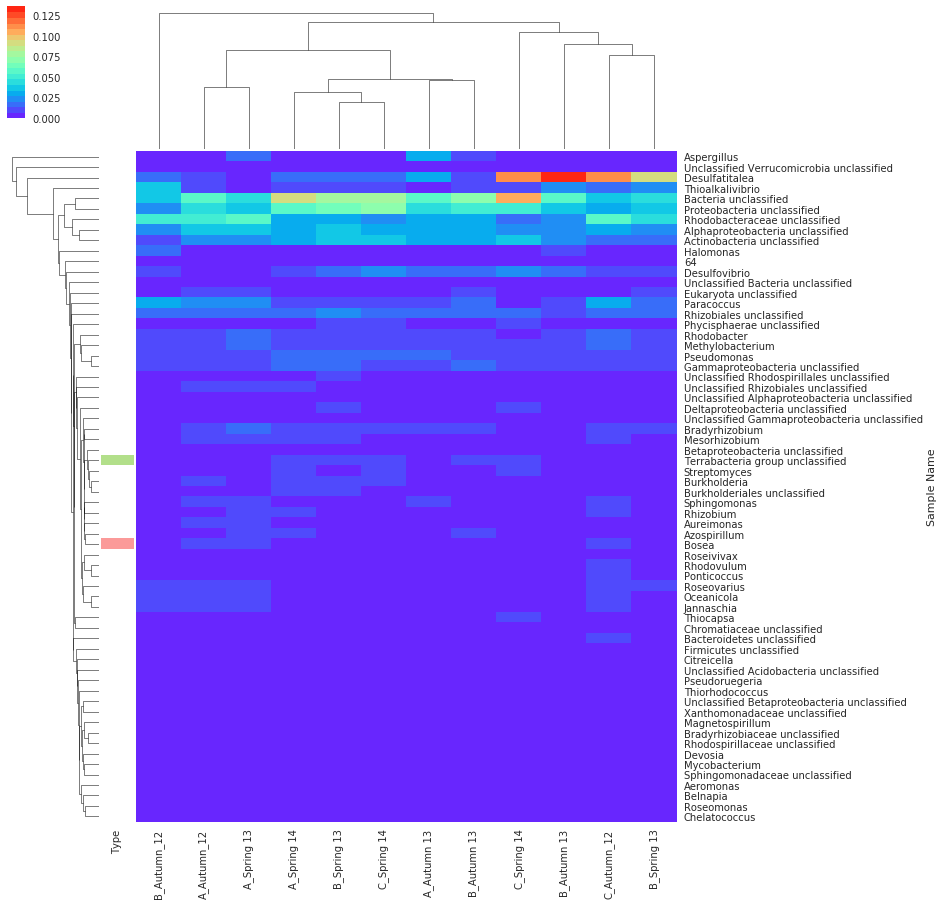

In [9]:
sns.set(font_scale=1)
row_colors=phylum.map(lut)
g=sns.clustermap(newdf, row_colors=row_colors, figsize=(12,15),method='single',
                  metric='braycurtis',cmap=sns.color_palette("rainbow", 20))
plt.tight_layout()

plt.savefig("../figures/test.heatmap.png",bbox_inches='tight', dpi=600)
#g.dendrogram_col.linkage # linkage matrix for columns
#g.dendrogram_row.linkage # linkage matrix for rows

# Loading  infile into a python dictionary 

In [18]:
def load_listdict(filename, sep=' ', single=False):
    """Loads a file into a python dictionary
    
    Arguments:
    - `filename`: The file name(path) the file must contain the folowing structure:
        * each line is a element of the dictionary
        * the first word is the key
        * following by a \t
        * next the elements corresponding to the value separated by 'sep'
    - `sep`: separator of the elements in the list
    - `single`: If sigle == True, the list file will be trated as a single dictionary, one key > one value. If False, the function asumes a the dictionary includes many values sep separated per key
    """
    dictionary = {}
    with open(filename, 'r') as inf:
        for line in inf:
            line = line.strip()
            line = line.split('\t')
            if line == '' : continue
            k = line[0]
            if single == True:
                v = line[1]
            else:
                v = line[1].split(' ')
            dictionary[k] = v
    return dictionary

In [29]:
# set params
matplotlib.rcParams['lines.linewidth'] = 0.4

# load data
data = pd.read_pickle('../data/datamat_non0.pd')

#data scaling normaliation
data_scaling = (data.T - data.T.min())/(data.T.max() - data.T.min())
data = data_scaling.T

In [37]:
data.head()

PF00034   PF00037  PF00005   PF13579   PF00534   PF01058  \
Env Meta                                                                   
air 4465825.3  0.130612  0.053061      1.0  0.069388  0.212245  0.016327   
    4465946.3  0.100806  0.056452      1.0  0.072581  0.236559  0.020161   
    4500755.3  0.000000  0.073529      1.0  0.000000  0.029412  0.014706   
    4516366.3  0.000000  0.066603      1.0  0.000000  0.115866  0.017393   
    4516402.3  0.000000  0.068968      1.0  0.000000  0.108287  0.016301   

                PF05239   PF00106   PF01613   PF13247    ...      PF01070  \
Env Meta                                                 ...                
air 4465825.3  0.000000  0.926531  0.020408  0.000000    ...     0.093878   
    4465946.3  0.000000  0.783602  0.044355  0.002688    ...     0.116935   
    4500755.3  0.000000  0.000000  0.000000  0.014706    ...     0.000000   
    4516366.3  0.009969  0.000000  0.000000  0.017393    ...     0.000000   
    4516402.3  0.008785  0.000000  0.000000  0.014732    ...     0.000000   

                PF00124   PF10518   PF00501   PF03144   PF03460   PF00355  \
Env Meta                                                                    
air 4465825.3  0.000000  0.032653  0.367347  0.126531  0.040816  0.069388   
    4465946.3  0.000000  0.024194  0.340054  0.139785  0.026882  0.059140   
    4500755.3  0.000000  0.000000  0.735294  0.044118  0.073529  0.058824   
    4516366.3  0.035900  0.013469  0.477145  0.028900  0.032188  0.050854   
    4516402.3  0.017613  0.013078  0.404013  0.025671  0.027168  0.046079   

                PF01583   PF00291   PF00111  
Env Meta                                     
air 4465825.3  0.032653  0.224490  0.044898  
    4465946.3  0.022849  0.280914  0.068548  
    4500755.3  0.044118  0.044118  0.102941  
    4516366.3  0.034097  0.027893  0.019355  
    4516402.3  0.032103  0.032830  0.019852  

[5 rows x 85 columns]

## Calculate distances

In [31]:
## - Metagenome distances
metadist = sch.distance.pdist(data, metric='braycurtis')
metalink = sch.linkage(metadist, method='average')
metalink = metalink.clip(0, metalink.max()+1)

## - Profile distances
profdist = sch.distance.pdist(data.T, metric='braycurtis')
proflink = sch.linkage(profdist, method='average')
proflink = proflink.clip(0, proflink.max()+1)


## Plot

[]

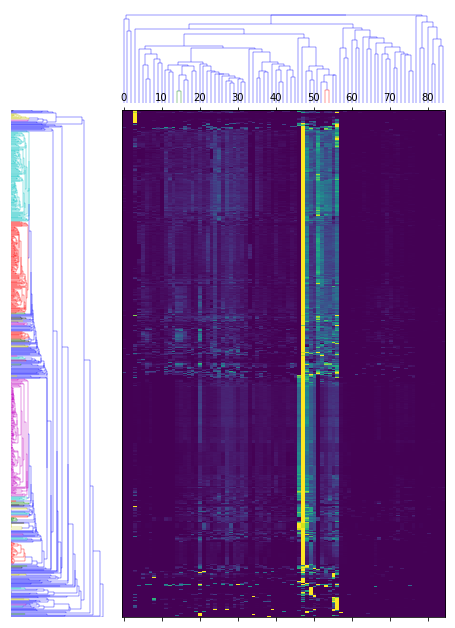

In [32]:
## - figure setup
xf = 6.7
yf = 8.6
fig = plt.figure(figsize=(xf, yf))
# positions
# posm = [0.05, 0.05, 0.2, 0.7]
# posm_colors = [0.25, 0.05, 0.01, 0.7]
# posp = [0.26, 0.76, 0.6, 0.2]
# posmat = [0.26, 0.05, 0.6, 0.7]
# poscbar = [0.91,0.1,0.02,0.8]

posm = [0.01, 0.01, 0.2, 0.82]
posp = [0.24, 0.84, 0.67, 0.15]
posmat = [0.24, 0.01, 0.67, 0.82]
posm_colors = [0.215, 0.01, 0.02, 0.82]
#poscbar = [0.94, 0.01, 0.02, 0.41]
poscbar = [0.92, 0.01, 0.015, 0.40]

## - Metagenome dendogram
meta_ax = fig.add_axes(posm, frameon=False)
metadend = sch.dendrogram(metalink,
                          color_threshold=0.2*max(metalink[:,2]),
                          orientation='right')
meta_ax.set_xticks([])
meta_ax.set_yticks([])

## - Profile dendogram
prof_ax = fig.add_axes(posp, frameon=False)
profdend = sch.dendrogram(proflink,
                          color_threshold=0.2*max(proflink[:,2]),
                          orientation='top')
prof_ax.set_xticks([])
prof_ax.set_yticks([])

## - Matrix
matrix_ax = fig.add_axes(posmat)
mat = data.get_values()
mmask = metadend['leaves']
pmask = profdend['leaves']
mat = mat[mmask, :]
mat = mat[:, pmask]
im = matrix_ax.matshow(mat, aspect='auto', origin='lower')
matrix_ax.set_yticks([])


In [23]:
# loadign and creating top pfam
def labels_names(data, namelist):
    """Plot in x label the names in list
    
    Arguments:
    - `data`: panda DataFrame
    - `namelist`: a python list of names. Must be contained in
    pandas data.columns
    """
    labels = []
    for col in data.columns:
        if col in namelist:
            labels.append(col)
        else:
            labels.append('')
    return np.array(labels)

In [24]:
top_pfam = pd.read_table('top_pfam_profiles.txt', index_col=0)
top_p = list(top_pfam.index)
labs = labels_names(data, top_p)
labs = labs[pmask]
top_pfam.head()

,mean,std
PF00374,0.693625,0.022168
PF00384,0.346500,0.013607
PF01058,0.428000,0.007348
PF01747,0.996875,0.014407
PF02635,0.361375,0.025934


([<matplotlib.axis.XTick at 0x7f2390244f98>,
 <a list of 85 Text xticklabel objects>)

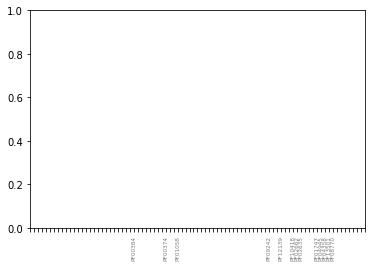

In [33]:
plt.xticks(np.arange(len(labs)), labs, rotation=90,
           fontsize='xx-small', color='grey')

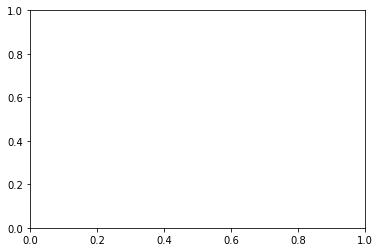

In [35]:
## - Colorbar
colorbar_ax = fig.add_axes(poscbar)
cb = plt.colorbar(im, cax=colorbar_ax)
cb.set_label('Normalized data', fontsize='x-small')
cb.ax.tick_params(labelsize='xx-small')

## - Color code
color_as = {'Air': 'grey',
            'Animal/plant_associated' : 'green',
            'Biofilms/microbialites': 'red',
            'Soil/sediment': 'yellow',
            'Water': 'blue'}
clas = load_listdict('../data/clasification_environments',
                     single=True)
color_vec = [color_as[clas[i[0]]] for i in data.index]
color_vec = np.array(color_vec)
color_vec = color_vec[mmask]
#color_vec = np.random.rand(len(data))
#filler = np.zeros(len(color_vec))
#color_mat = np.vstack((color_vec, filler)).T
color_ax = fig.add_axes(posm_colors, frameon=False)
lefts = range(0, len(color_vec), 1)
height = np.ones(len(color_vec))
width = 1
metabars = color_ax.barh(lefts, height, width, color=color_vec,
                        edgecolor=color_vec)
#im_col = color_ax.matshow(color_mat, aspect='auto', origin="lower")
#color_ax.set_xlim(-0.5, 0.5)
color_ax.set_xticks([])
color_ax.set_yticks([])
color_ax.set_ylim((0, len(color_vec)))

## - show
#plt.show()
fig.savefig('heatmap_pru.png', dpi=500)


In [28]:
## - color legend
import matplotlib.patches as mpatches
poslegend = [0.01, 0.84, 0.23, 0.15]
legend_ax = fig.add_axes(poslegend, frameon=False)
legend_ax.set_xticks([])
legend_ax.set_yticks([])

patches = []
for name, color_ in dict.items():
    p = mpatches.Patch(color=color_, label=name)
    patches.append(p)

plt.legend(handles=patches, fancybox=True, fontsize='xx-small')


## - show
#plt.show()

fig.savefig('heatmap_pru.png', dpi=500)

## -save data
clustdata = data.iloc[mmask, pmask]
clustdata.to_csv('matdata_clust_pru.txt', sep='\t')

TypeError: descriptor 'items' of 'dict' object needs an argument